# MNIST VERİ SETİ
0'dan 9'a kadar olan rakamların el yazısı görselleri.

In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [41]:
train_images.shape #array'in biçimini gösteriyor
# genel olarak (sample, feature) formatında oluyor
# resimler için (sample, height, width, color_depth)
# bu eğitim görselleri için: 60000 fotoğraf, 28x28 boyutunda
# video için (samples, frames, height, width, color_depth)

(60000, 28, 28)

In [4]:
len(train_labels) # len ile adet "sample/örnek" var

60000

In [5]:
train_labels # görsellerde hangi resimler olduğu, nasıl "etiketlendiği"

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_images.shape # 10000 adet 28x28 test görseli

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [10]:
from tensorflow import keras # keras, deep learning framework'ü
from tensorflow.keras import layers
model = keras.Sequential([ # katmanlar oluşturuyoruz
    layers.Dense(512, activation="relu"), #units kaç nöron olacağı/çıkış boyutu
    layers.Dense(10, activation="softmax")
])

In [11]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy", #gerçek değer - tahmin
              metrics=["accuracy"])

In [12]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

# siyah 0, beyaz 255'tir fakat biz bunu normalleştirip daha ufak sayılarla
# uğraşmak isteriz. bu sebeple 255'e bölerek bunu 0-1 arasında sınırlıyoruz.
# float'a çevrilme sebebi matris hesaplamalarında ve gradient descent'te
# daha doğru sonuçlar alabilmek.

# (60000, 28*28) yaparak bunu (60000, 784) haline çeviriyoruz.
# Çünkü Dense düzleştirilmiş (flatten) vektörlerle çalışıyor bu yüzden genelde
# 2D vektörler verilir. Biz de bunun için 2D vektör haline getirdik.

In [13]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.1690 - loss: 2.2823
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.5451 - loss: 1.9064
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7125 - loss: 1.1962
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7924 - loss: 0.8250
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8287 - loss: 0.6489


In [14]:
test_digits = test_images[0:10] # ilk 10 örnek 0-9
predictions = model.predict(test_digits) # ilk 10 örnek için tahminler oluştu.
predictions[0] # 0 indeksindeki (ilk) örnek için tahminler

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([5.8977620e-04, 4.5605964e-05, 1.0063551e-04, 1.2872067e-03,
       1.7258996e-03, 2.5792336e-03, 9.4219286e-06, 9.6636724e-01,
       3.9739686e-04, 2.6897451e-02], dtype=float32)

In [15]:
predictions[0].argmax() # ilk örnek için tahminlerden en yükseği

np.int64(7)

In [16]:
predictions[0][7] # kaç oranla 7 olduğunu tahmin ettiği

np.float32(0.96636724)

In [17]:
test_labels[0] # gerçekte etiketinde ne olduğu (o da 7)

np.uint8(7)

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")
print(f"test_loss: {test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8273 - loss: 0.6133
test_acc: 0.848800003528595
test_loss: 0.5552056431770325


# SİNİR AĞLARI İÇİN VERİ GÖSTERİMİ

In [19]:
#scalar -> tek boyutlu vektör, rank(0)
import numpy as np
x = np.array(12)
x

array(12)

In [20]:
x.ndim # kaç boyutlu olduğu, skalar olduğu için 0

0

In [22]:
# "vektör" rank 1 tensors
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [23]:
x.ndim # 5 adet verisi var. 5D vector ama 1D tensor,
#her bir [] tensör diyebiliriz.

1

In [24]:
# matris -> 2D tensors
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35 ,1],
              [7, 80, 4, 36, 2]])
x.ndim

2

In [25]:
# rank 3 -> 3D tensors
x = np.array([[[5, 78, 2, 34, 0],
              [6, 79, 3, 35 ,1],
              [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
              [6, 79, 3, 35 ,1],
              [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
              [6, 79, 3, 35 ,1],
              [7, 80, 4, 36, 2]]])

x.ndim

3

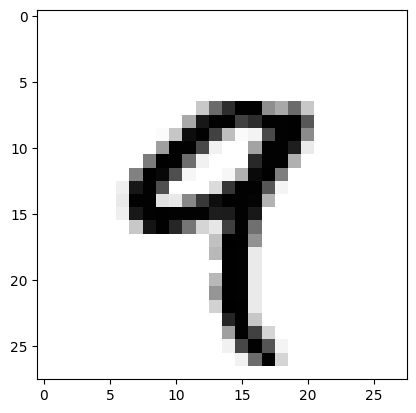

In [26]:
import matplotlib.pyplot as plt
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary) #cmap: colormap. binary -> siyah/beyaz
plt.show()

In [27]:
train_labels[4]

np.uint8(9)

In [28]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [29]:
my_slice = train_images[10:100, : , : ]
my_slice.shape

(90, 28, 28)

In [30]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [31]:
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

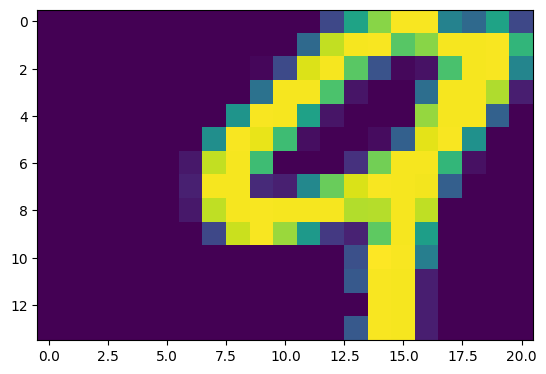

In [32]:
train_digit = train_images[4, 7:-7, :-7]
plt.imshow(train_digit)
plt.show()

# BATCH

In [33]:
# batchler bir gruplar, model genel olarak datasetini tek seferde işlemez, böler

In [35]:
batch = train_images[:128] # ilk 128'lik kısım
batch = train_images[128:255] #2. 128'lik kısım

In [36]:
batch.shape

(127, 28, 28)

In [38]:
# n. batch
n = 3
batch = train_images[128 * n: 128 * (n+1)]
batch.shape


# veri setini 128 128 olarak bölüyoruz
# kaçıncı 128'lik bölümü aradığımızı bu şekilde buluyoruz


(128, 28, 28)

# elle relu yazma
ReLU: 0'dan önceki değerler 0, 0'dan itibaren lineer olark artıyor

In [39]:
X = np.array([
    [-1, 2, -3],
    [4, -5, 6]
])

In [43]:
def naive_relu(x):
  assert len(x.shape) == 2
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] = max(x[i,j], 0) # 0 ile karşılaştırıyor, negatif ise 0 alıyor
  return x

naive_relu(X)

array([[0, 2, 0],
       [4, 0, 6]])

In [44]:
Y = np.array([
    [2, -4, 7],
    [-2, 9, -1]
])

# toplama

def naive_add(x, y):
  assert len(x.shape) == 2
  assert x.shape == y.shape
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i ,j] += y[i, j]

  return x

print(X)
print(Y)
naive_add(X,Y)


[[-1  2 -3]
 [ 4 -5  6]]
[[ 2 -4  7]
 [-2  9 -1]]


array([[ 1, -2,  4],
       [ 2,  4,  5]])

In [45]:
# döngülerle yazmak ile matris yöntemi arasındaki zaman farkı

import time
x = np.random.random((20,100))
y = np.random.random((20,100))

t0 = time.time()
for _ in range(1000):
  z = x + y
  z = np.maximum(z, 0.)
  print("Took: {0:.2f} s".format(time.time() - t0))


Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s
Took: 0.00 s

In [46]:
t0 = time.time()
for _ in range(1000):
  z = naive_add(x,y)
  z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 1.86 s


# Broadcast

farklı shape'e ve boyuta sahip tensörlerde işlem yapmak. 2D bir tensor ile 1D vektör toplanacaksa, vektör tüm 2D elemanlarına uygulanır (broadcast edilir).


In [47]:
import numpy as np
x = np.random.random((32, 10)) # 32 x 10 matris
y = np.random.random((10,)) # 10 x 1 vector
print(f"x_dim : {x.ndim} and x_shape : {x.shape}\ny_dim : {y.ndim} and y_shape : {y.shape}")
y

x_dim : 2 and x_shape : (32, 10)
y_dim : 1 and y_shape : (10,)


array([0.35797921, 0.41214668, 0.66052297, 0.91704308, 0.53350239,
       0.02771112, 0.60856278, 0.52241871, 0.73281581, 0.56373615])

In [48]:
y = np.expand_dims(y, axis = 0)
print(f"y_dim : {y.ndim} and y_shape : {y.shape}")

y_dim : 2 and y_shape : (1, 10)


In [49]:
y

array([[0.35797921, 0.41214668, 0.66052297, 0.91704308, 0.53350239,
        0.02771112, 0.60856278, 0.52241871, 0.73281581, 0.56373615]])

In [50]:
y = np.concatenate([y] * 32, axis=0)
print(f"y_dim : {y.ndim} and y_shape : {y.shape}")
y

y_dim : 2 and y_shape : (32, 10)


array([[0.35797921, 0.41214668, 0.66052297, 0.91704308, 0.53350239,
        0.02771112, 0.60856278, 0.52241871, 0.73281581, 0.56373615],
       [0.35797921, 0.41214668, 0.66052297, 0.91704308, 0.53350239,
        0.02771112, 0.60856278, 0.52241871, 0.73281581, 0.56373615],
       [0.35797921, 0.41214668, 0.66052297, 0.91704308, 0.53350239,
        0.02771112, 0.60856278, 0.52241871, 0.73281581, 0.56373615],
       [0.35797921, 0.41214668, 0.66052297, 0.91704308, 0.53350239,
        0.02771112, 0.60856278, 0.52241871, 0.73281581, 0.56373615],
       [0.35797921, 0.41214668, 0.66052297, 0.91704308, 0.53350239,
        0.02771112, 0.60856278, 0.52241871, 0.73281581, 0.56373615],
       [0.35797921, 0.41214668, 0.66052297, 0.91704308, 0.53350239,
        0.02771112, 0.60856278, 0.52241871, 0.73281581, 0.56373615],
       [0.35797921, 0.41214668, 0.66052297, 0.91704308, 0.53350239,
        0.02771112, 0.60856278, 0.52241871, 0.73281581, 0.56373615],
       [0.35797921, 0.41214668, 0.6605229

In [51]:
def naive_add_matrix_and_vector(x,y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  x = x.copy()

  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[i, j]
  return x

In [52]:
# peki hangi değişken broadcast yapılmasına daha uygun

x = np.random.random((64, 3, 32, 10))
y = np.random.random((32,10))
z = np.maximum(x,y)
print(z.shape)

(64, 3, 32, 10)


# tensor çarpımı -> nokta çarpımı


In [53]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x,y)
print(f"z.shape: {z.shape} çünkü z.ndim: {z.ndim} -> skaler bir sayı")

z.shape: () çünkü z.ndim: 0 -> skaler bir sayı


In [54]:
def naive_vector_dot(x,y):
  assert len(x.shape) == 1
  assert len(y.shape) == 1
  assert x.shape[0] == y.shape[0]
  z = 0.
  for i in range(x.shape[0]):
    z += x[i] * y[i]
  return z

print(f"{naive_vector_dot(x,y)} vs {np.dot(x,y)}")


9.383818047803189 vs 9.383818047803189


In [55]:
a = np.array([3,2,1])
b = np.array([4,5,6])
c = np.array([[7,2,5], [4, 1, 6]])
print(np.dot(a,b))

28


In [56]:
a.shape, b.shape, c.shape


((3,), (3,), (2, 3))

In [57]:
def naive_matrix_vector_dot(x,y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]
  z = np.zeros(x.shape[0])
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      z[i] += x[i, j] * y[j]
  return z

naive_matrix_vector_dot(c,a)

array([30., 20.])

In [58]:
def naive_matrix_vector_dot(x,y):
  z = np.zeros(x.shape[0])
  for i in range(x.shape[0]):
    z[i] = naive_vector_dot(x[i,:], y)
  return z

naive_matrix_vector_dot(c,a)

array([30., 20.])

In [59]:
c = np.array([[7,2], [4, 1]])
d = np.array([[3,1,6], [7, 4, 9]])

def naive_matrix_dot(x,y):
  assert x.shape[0] == 2
  assert y.shape[0] == 2
  assert x.shape[1] == y.shape[0]
  z = np.zeros((x.shape[0],  y.shape[1]))

  for i in range(x.shape[0],):
    for j in range(y.shape[1]):
      row_x = x[i, : ]
      column_y = y[:, j]
      z[i, j] = naive_vector_dot(row_x, column_y)
  return z


naive_matrix_dot(c,d)

array([[35., 15., 60.],
       [19.,  8., 33.]])

# MATRİSLERDE İŞLEMLERİ DAHA İYİ ANLAMAK İÇİN EGZERSİZLER
Matrislerde işlem yapmaya daha da aşina olabilmek için uygulamalı lineer cebir kitabındaki örnekleri çözüyorum

In [60]:
# matrislerde toplama

A = np.array([[1,-2,3],
              [2,-1,4]
              ])
B = np.array([[0,2,1],
              [1,3,-4]
              ])

print(f"A: {A.shape} vs B: {B.shape}")

print(f"{A + B}")

z = np.zeros((A.shape[0], A.shape[1]))
for i in range(A.shape[0]):
  for j in range(A.shape[1]):
    z[i, j] = A[i, j] + B[i, j]
print(f"{z}")


A: (2, 3) vs B: (2, 3)
[[1 0 4]
 [3 2 0]]
[[1. 0. 4.]
 [3. 2. 0.]]


In [61]:
# skalar çarpım
A = np.array(-2)
B = np.array([[4,-2,-3],
              [7,-3,2]
              ])

z = np.zeros((B.shape[0], B.shape[1]))
for i in range(B.shape[0]):
  for j in range(B.shape[1]):
    z[i,j] += A * B[i,j]
print(z)


print(A*B)

[[ -8.   4.   6.]
 [-14.   6.  -4.]]
[[ -8   4   6]
 [-14   6  -4]]


In [62]:
# matris farkı
A = np.array([[2,3,-5],
              [4,2,1]
              ])

B = np.array([[2,-1,3],
              [3,5,-2]
              ])

A = A.copy()

for i in range(A.shape[0]):
  for j in range(A.shape[1]):
      A[i, j] -= B[i, j]

A

array([[ 0,  4, -8],
       [ 1, -3,  3]])

In [63]:
A = np.array([
    [0, -3, 5],
    [2,3,4],
    [1,-2,-3]])

B = np.array([
    [5, 2, 3],
    [6,2,3],
    [-1,-2,3]
])

z = np.dot(3,A) - np.dot(0.5, B)
z

array([[ -2.5, -10. ,  13.5],
       [  3. ,   8. ,  10.5],
       [  3.5,  -5. , -10.5]])

# Tensor reshaping
satır ve sütunları tekrardan düzenliyoruz


In [65]:
x = np.array([
    [0., 1.],
    [2., 3.],
    [4., 5.]
])

print(x.shape,end="\n--------------\n")
x = x.reshape((6,1))
print(x)
print(x.shape,end="\n--------------\n")
x = x.reshape((2,3))
print(x)
print(x.shape,end="\n--------------\n")

# burada
# 0 2 4
# 1 3 5

# şeklinde transpoz almak yerine

# 0 1 2
# 3 4 5

# geldi çünkü reshape öncelikle hepsini tek bir satıra alıyor "flatten" yapıyor
# [0 1 2 3 4 5] oluyor ve sonrasında ayırıyor


(3, 2)
--------------
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]
(6, 1)
--------------
[[0. 1. 2.]
 [3. 4. 5.]]
(2, 3)
--------------


In [66]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

In [67]:
x = np.array([
    [0., 1.],
    [2., 3.],
    [4., 5.]
])

print(x,end="\n------------\n")

print(np.transpose(x))

[[0. 1.]
 [2. 3.]
 [4. 5.]]
------------
[[0. 2. 4.]
 [1. 3. 5.]]
